In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes', index_col=0)

In [3]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.shape

(1525, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [6]:
df.duplicated().sum()

8

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(1517, 9)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [12]:
df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [13]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [104]:
df.skew(axis=0,skipna=True)

<ipython-input-104-7b7ac9ec003c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True)


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

AGE


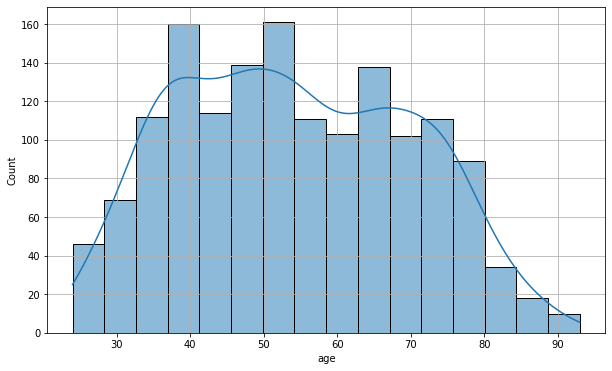

ECONOMIC.COND.NATIONAL


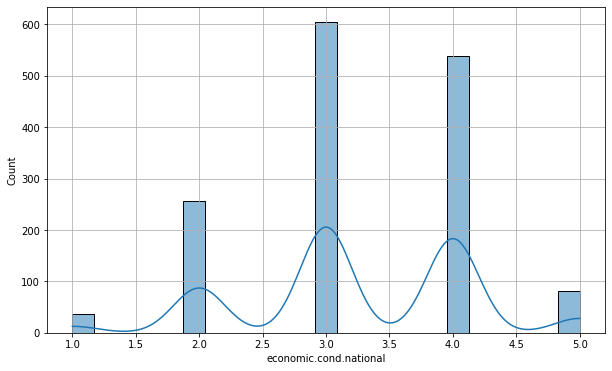

ECONOMIC.COND.HOUSEHOLD


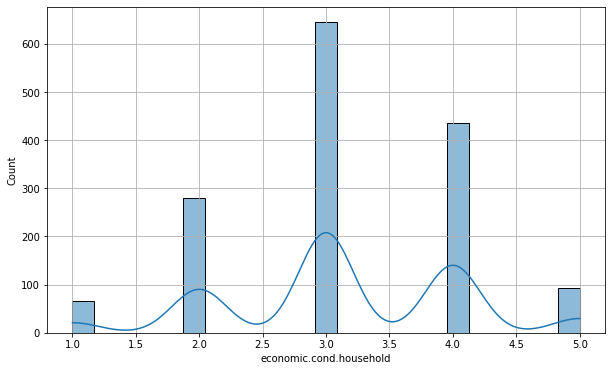

BLAIR


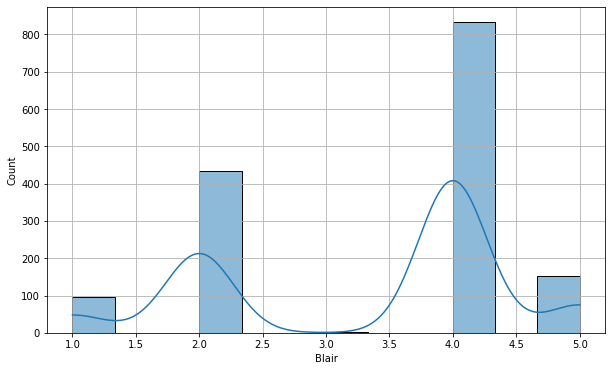

HAGUE


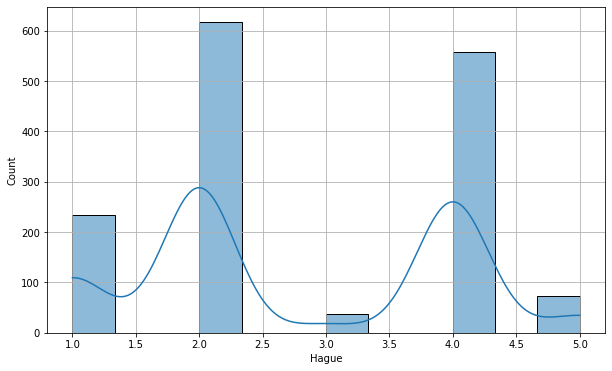

EUROPE


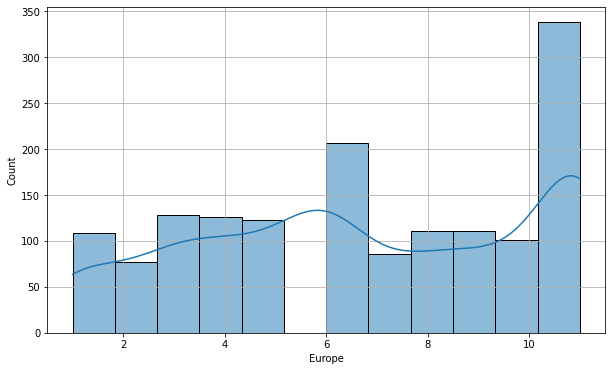

POLITICAL.KNOWLEDGE


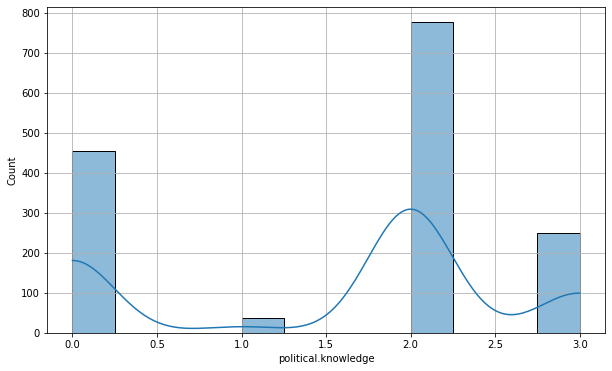

In [15]:
for columns in df.columns:
    if df[columns].dtype != 'object':
        print(columns.upper())
        plt.figure(figsize=(10,6))
        sns.histplot(df[columns], kde=True)
        plt.grid()
        plt.show()

<AxesSubplot:>

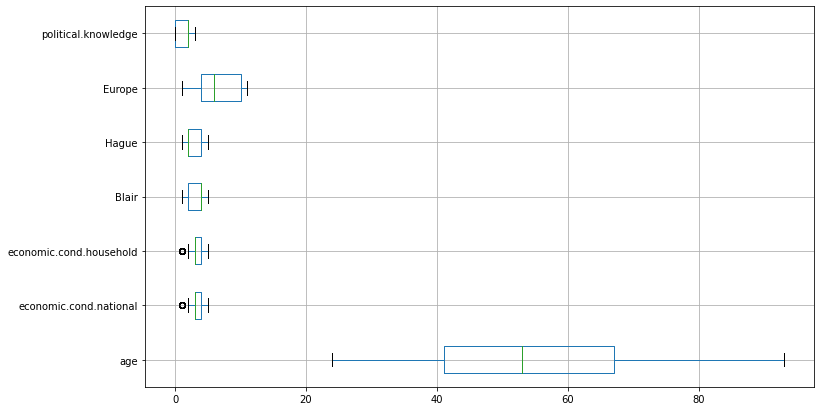

In [109]:
plt.figure(figsize=(12,7))
df.boxplot(vert=0)

VOTE


C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


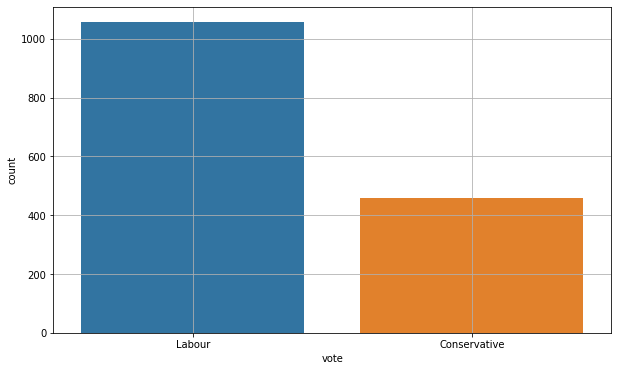

GENDER


C:\Users\bicky\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


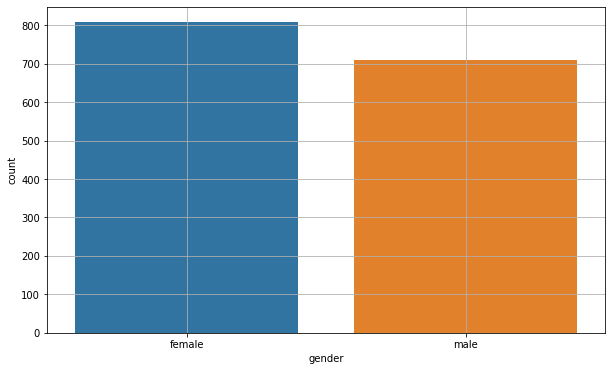

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper())
        plt.figure(figsize=(10,6))
        sns.countplot(df[column])
        plt.grid()
        plt.show()
    

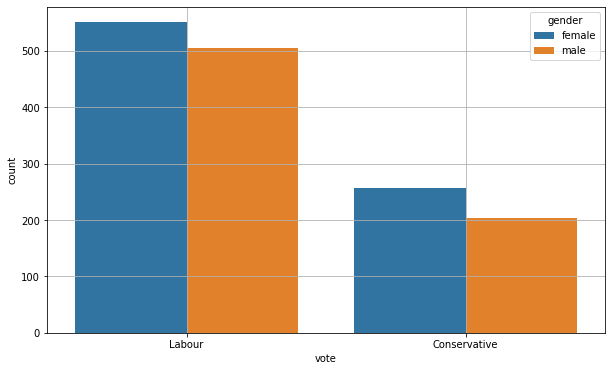

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='vote', hue='gender')
plt.grid()
plt.show()

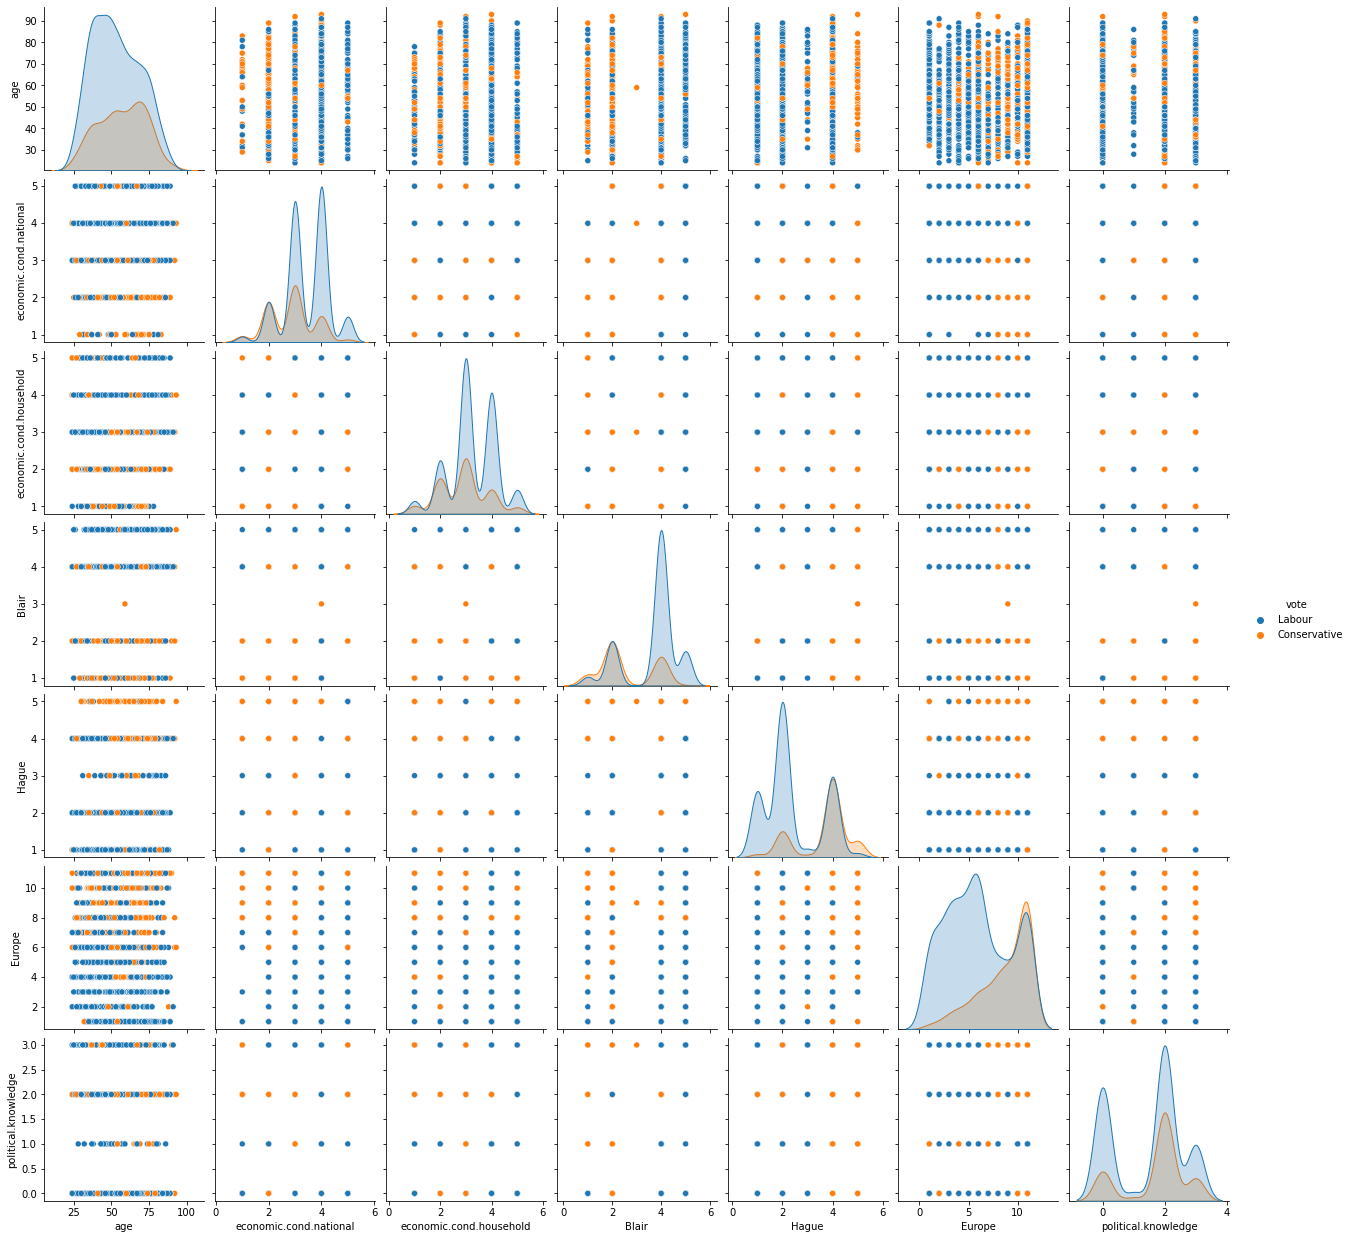

In [19]:
sns.pairplot(df, hue='vote')

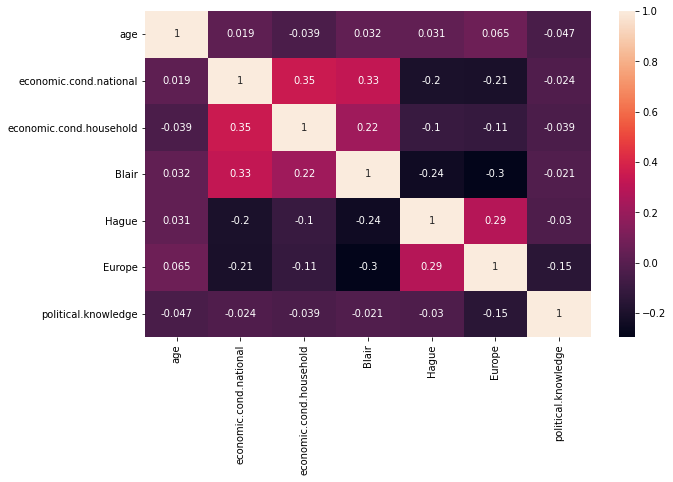

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df1=pd.get_dummies(df, columns = ['vote', 'gender'], drop_first=True)

In [15]:
df1.head(5)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3,3,4,1,2,2,1,0
2,36,4,4,4,4,5,2,1,1
3,35,4,4,5,2,3,2,1,1
4,24,4,2,2,1,4,0,1,0
5,41,2,2,1,1,6,2,1,1


In [16]:
df1['vote_Labour'].value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

In [17]:
df1['gender_male'].value_counts()

0    808
1    709
Name: gender_male, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df1.drop(['vote_Labour','age'], axis=1)
y= df1.pop('vote_Labour')

In [20]:
X.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1,3,3,4,1,2,2,0
2,4,4,4,4,5,2,1
3,4,4,5,2,3,2,1
4,4,2,2,1,4,0,0
5,2,2,1,1,6,2,1


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   economic.cond.national   1517 non-null   int64
 1   economic.cond.household  1517 non-null   int64
 2   Blair                    1517 non-null   int64
 3   Hague                    1517 non-null   int64
 4   Europe                   1517 non-null   int64
 5   political.knowledge      1517 non-null   int64
 6   gender_male              1517 non-null   uint8
dtypes: int64(6), uint8(1)
memory usage: 84.4 KB


In [22]:
from scipy.stats import zscore

In [23]:
X1 = X.apply(zscore)

In [24]:
X1.describe()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,-1.984789e-16,-2.397189e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-2.547041e+00,-2.296796e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-2.781853e-01,-1.480205e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-2.781853e-01,-1.480205e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,8.562424e-01,9.263674e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,1.990670e+00,2.000755e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler().fit(X)
X2=scaler.transform(X)
X2=pd.DataFrame(X2, columns=X.columns)

In [27]:
X2.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [28]:
X2.describe()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.561305,0.534443,0.583883,0.437376,0.574028,0.513514,0.467370
std,0.220448,0.232767,0.293693,0.308120,0.329904,0.361472,0.499099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.250000,0.250000,0.300000,0.000000,0.000000
50%,0.500000,0.500000,0.750000,0.250000,0.500000,0.666667,0.000000
75%,0.750000,0.750000,0.750000,0.750000,0.900000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

In [30]:
#Logistic Regression

In [31]:
from sklearn import metrics

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  2.074803  0.382067  2.183207 -3.000625 -2.041518 -0.875997  0.205493   

   intercept  
0   1.530704  


In [35]:
model_score_test=model.score(X_test, y_test)
print(model_score_test)

0.8157894736842105


In [36]:
model_score_train=model.score(X_train, y_train)
print(model_score_train)

0.8322337417530632


<AxesSubplot:>

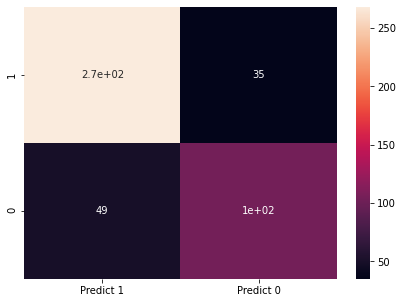

In [37]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [38]:
cr = metrics.classification_report(y_test, y_predict)
print(cr)
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.81      0.82      0.81       456

[[104  49]
 [ 35 268]]


In [39]:
y_predict_train = model.predict(X_train)

print(metrics.classification_report(y_train, y_predict_train))
print(metrics.confusion_matrix(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       307
           1       0.85      0.92      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061

[[188 119]
 [ 59 695]]


In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC Train: 0.888
AUC Test: 0.879


Text(0.5, 1.0, 'Test Set')

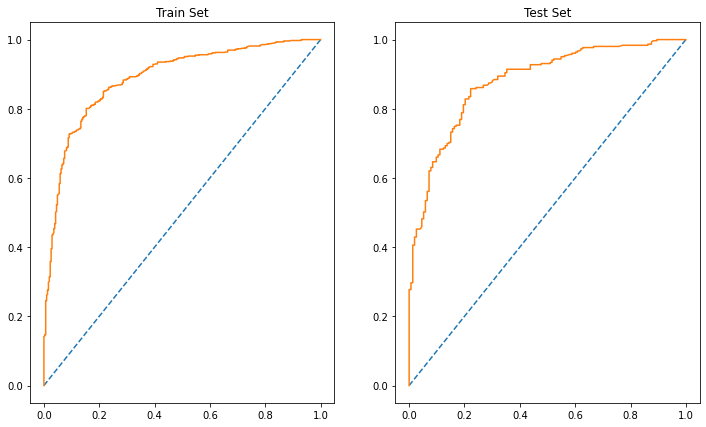

In [41]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [42]:
#LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [44]:
y_train_predictLDA = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictLDA))
print(metrics.classification_report(y_train, y_train_predictLDA))

0.8322337417530632
[[194 113]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [45]:
y_test_predictLDA = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictLDA))
print(metrics.classification_report(y_test, y_test_predictLDA))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC Train: 0.888
AUC Test: 0.882


Text(0.5, 1.0, 'Test Set')

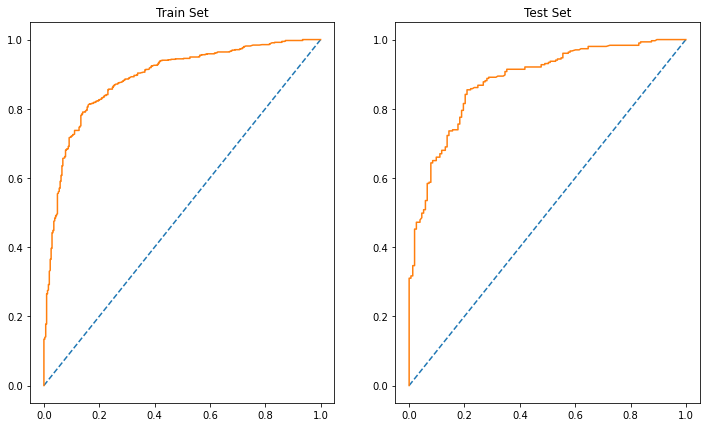

In [46]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = LDA_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = LDA_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [47]:
#KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [49]:
y_train_predictKNN = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictKNN))
print(metrics.classification_report(y_train, y_train_predictKNN))

0.8605089538171536
[[223  84]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [50]:
y_test_predictKNN = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictKNN))
print(metrics.classification_report(y_test, y_test_predictKNN))

0.7916666666666666
[[100  53]
 [ 42 261]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       153
           1       0.83      0.86      0.85       303

    accuracy                           0.79       456
   macro avg       0.77      0.76      0.76       456
weighted avg       0.79      0.79      0.79       456



AUC Train: 0.927
AUC Test: 0.851


Text(0.5, 1.0, 'Test Set')

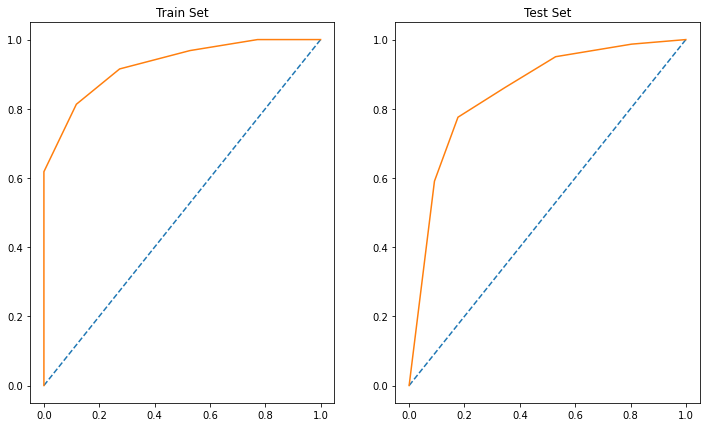

In [51]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = KNN_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = KNN_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [52]:
#NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [54]:
y_train_predictNB = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictNB))
print(metrics.classification_report(y_train, y_train_predictNB))

0.8294062205466541
[[210  97]
 [ 84 670]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       307
           1       0.87      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [55]:
y_test_predictNB = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictNB))
print(metrics.classification_report(y_test, y_test_predictNB))

0.8201754385964912
[[112  41]
 [ 41 262]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       153
           1       0.86      0.86      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC Train: 0.887
AUC Test: 0.873


Text(0.5, 1.0, 'Test Set')

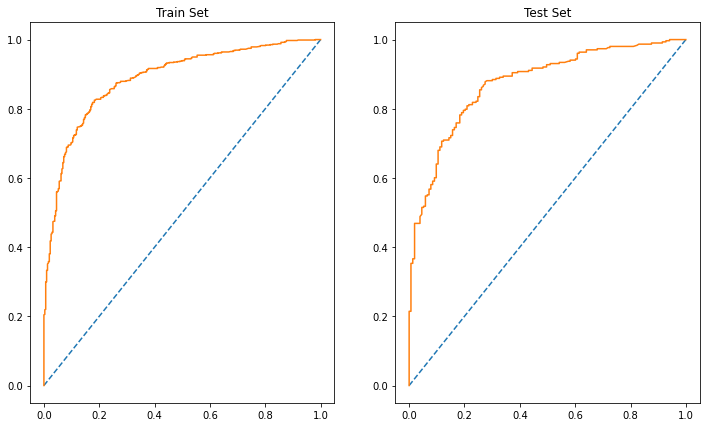

In [56]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = NB_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [57]:
#Decision Tree

In [58]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_train_predictDT = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictDT))
print(metrics.classification_report(y_train, y_train_predictDT))

0.9660697455230914
[[305   2]
 [ 34 720]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       307
           1       1.00      0.95      0.98       754

    accuracy                           0.97      1061
   macro avg       0.95      0.97      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [60]:
y_test_predictDT = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictDT))
print(metrics.classification_report(y_test, y_test_predictDT))

0.7719298245614035
[[ 97  56]
 [ 48 255]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       153
           1       0.82      0.84      0.83       303

    accuracy                           0.77       456
   macro avg       0.74      0.74      0.74       456
weighted avg       0.77      0.77      0.77       456



AUC Train: 0.997
AUC Test: 0.746


Text(0.5, 1.0, 'Test Set')

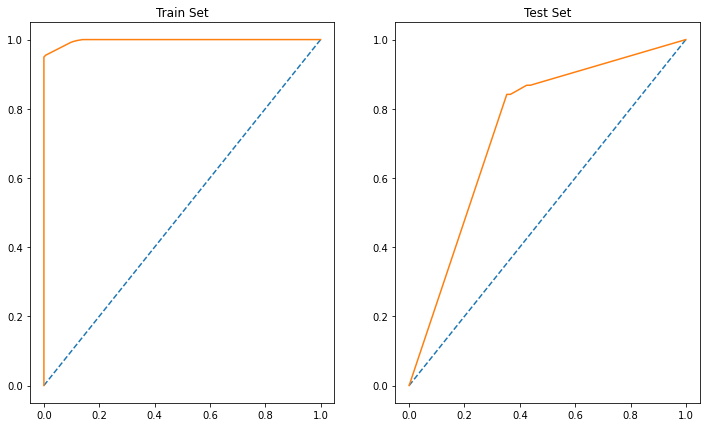

In [61]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = DT_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = DT_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [62]:
#ADA BOOSTING

In [63]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [64]:
y_train_predictADB = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictADB))
print(metrics.classification_report(y_train, y_train_predictADB))

0.8426013195098964
[[203 104]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [65]:
y_test_predictADB = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictADB))
print(metrics.classification_report(y_test, y_test_predictADB))

0.8114035087719298
[[102  51]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC Train: 0.902
AUC Test: 0.874


Text(0.5, 1.0, 'Test Set')

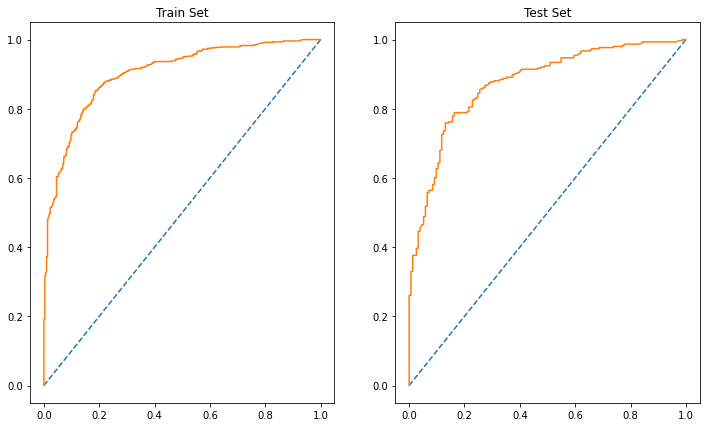

In [66]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = ADB_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [67]:
#GRADIENT BOOSTING

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [69]:
y_train_predictGBC = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictGBC))
print(metrics.classification_report(y_train, y_train_predictGBC))

0.8784165881244109
[[231  76]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       307
           1       0.90      0.93      0.92       754

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



In [70]:
y_test_predictGBC = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictGBC))
print(metrics.classification_report(y_test, y_test_predictGBC))

0.8223684210526315
[[106  47]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC Train: 0.938
AUC Test: 0.893


Text(0.5, 1.0, 'Test Set')

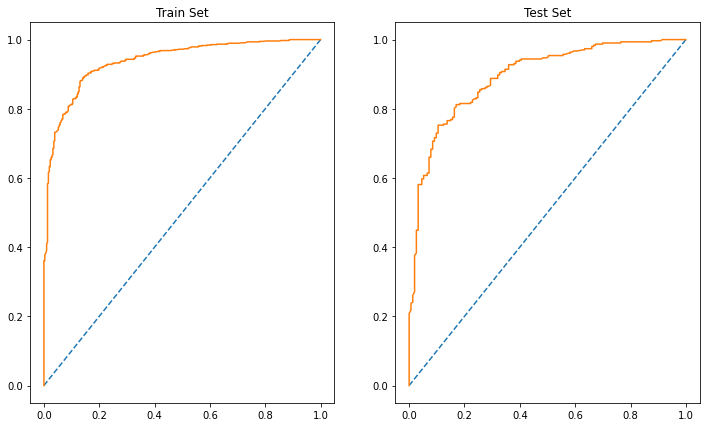

In [71]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = gbcl.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [72]:
#RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=3, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=3, random_state=1)

In [74]:
y_train_predictRF = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictRF))
print(metrics.classification_report(y_train, y_train_predictRF))

0.823751178133836
[[153 154]
 [ 33 721]]
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       307
           1       0.82      0.96      0.89       754

    accuracy                           0.82      1061
   macro avg       0.82      0.73      0.75      1061
weighted avg       0.82      0.82      0.81      1061



In [75]:
y_test_predictRF = RF_model.predict(X_test)
model_score =RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictRF))
print(metrics.classification_report(y_test, y_test_predictRF))

0.8004385964912281
[[ 80  73]
 [ 18 285]]
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       153
           1       0.80      0.94      0.86       303

    accuracy                           0.80       456
   macro avg       0.81      0.73      0.75       456
weighted avg       0.80      0.80      0.79       456



AUC Train: 0.899
AUC Test: 0.878


Text(0.5, 1.0, 'Test Set')

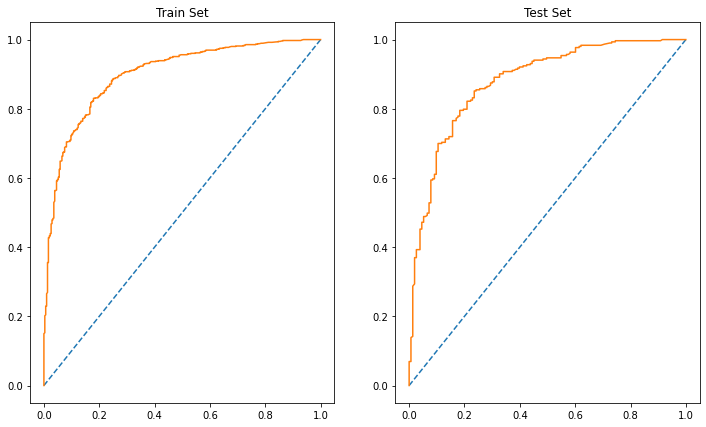

In [76]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = RF_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [77]:
#BAGGING

In [78]:
from sklearn.ensemble import BaggingClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=1000, random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=1000,
                  random_state=1)

In [79]:
y_train_predictBG = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predictBG))
print(metrics.classification_report(y_train, y_train_predictBG))

0.937794533459001
[[263  44]
 [ 22 732]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       307
           1       0.94      0.97      0.96       754

    accuracy                           0.94      1061
   macro avg       0.93      0.91      0.92      1061
weighted avg       0.94      0.94      0.94      1061



In [80]:
y_test_predictBG = Bagging_model.predict(X_test)
model_score =Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predictBG))
print(metrics.classification_report(y_test, y_test_predictBG))

0.8179824561403509
[[105  48]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       153
           1       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC Train: 0.989
AUC Test: 0.882


Text(0.5, 1.0, 'Test Set')

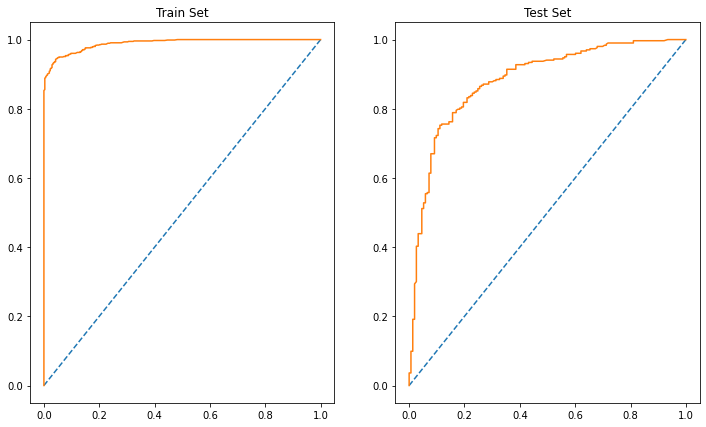

In [81]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC Train: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title('Train Set')

plt.subplot(1, 2, 2)
probs1 = Bagging_model.predict_proba(X_test)
probs1 = probs1[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC Test: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);
plt.title('Test Set')


In [89]:
#Problem - 02

In [115]:
import nltk
import random
import string

In [116]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\bicky\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [117]:
len(inaugural.fileids())

59

In [118]:
sp = inaugural.fileids()

In [119]:
sp[38], sp[43], sp[46]

('1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt')

In [120]:
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

In [121]:
print('The number of characters in Roosevelt speech :', len(Roosevelt))
print('The number of characters in Kennedy speech :', len(Kennedy))
print('The number of characters in Nixon speech :', len(Nixon))

The number of characters in Roosevelt speech : 7571
The number of characters in Kennedy speech : 7618
The number of characters in Nixon speech : 9991


In [122]:
print('The number of words in Roosevelt speech :', len(inaugural.raw('1941-Roosevelt.txt').split()))
print('The number of words in Kennedy speech :', len(inaugural.raw('1961-Kennedy.txt').split()))
print('The number of words in Nixon speech :', len(inaugural.raw('1973-Nixon.txt').split()))

The number of words in Roosevelt speech : 1360
The number of words in Kennedy speech : 1390
The number of words in Nixon speech : 1819


In [123]:
y=pd.DataFrame({'text':inaugural.raw('1941-Roosevelt.txt')}, index= [0])
y['sentences']=y['text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,text,sentences
0,On each national day of inauguration since 178...,67


In [124]:
y=pd.DataFrame({'text':inaugural.raw('1961-Kennedy.txt')}, index= [0])
y['sentences']=y['text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,text,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [125]:
y=pd.DataFrame({'text':inaugural.raw('1973-Nixon.txt')}, index= [0])
y['sentences']=y['text'].apply(lambda x:len([x for x in x.split() if x.endswith('.')]))
y

,text,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


In [126]:
words1=list(inaugural.words(fileids=sp[38]))
words1

['On',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people',
 'have',
 'renewed',
 'their',
 'sense',
 'of',
 'dedication',
 'to',
 'the',
 'United',
 'States',
 '.',
 'In',
 'Washington',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'create',
 'and',
 'weld',
 'together',
 'a',
 'nation',
 '.',
 'In',
 'Lincoln',
 "'",
 's',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'was',
 'to',
 'preserve',
 'that',
 'Nation',
 'from',
 'disruption',
 'from',
 'within',
 '.',
 'In',
 'this',
 'day',
 'the',
 'task',
 'of',
 'the',
 'people',
 'is',
 'to',
 'save',
 'that',
 'Nation',
 'and',
 'its',
 'institutions',
 'from',
 'disruption',
 'from',
 'without',
 '.',
 'To',
 'us',
 'there',
 'has',
 'come',
 'a',
 'time',
 ',',
 'in',
 'the',
 'midst',
 'of',
 'swift',
 'happenings',
 ',',
 'to',
 'pause',
 'for',
 'a',
 'moment',
 'and',
 'take',
 'stock',
 '--',
 'to',
 'recall',
 'what',
 'our',
 'place',
 'in'

In [127]:
words2=list(inaugural.words(fileids=sp[43]))
words2

['Vice',
 'President',
 'Johnson',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'President',
 'Eisenhower',
 ',',
 'Vice',
 'President',
 'Nixon',
 ',',
 'President',
 'Truman',
 ',',
 'reverend',
 'clergy',
 ',',
 'fellow',
 'citizens',
 ',',
 'we',
 'observe',
 'today',
 'not',
 'a',
 'victory',
 'of',
 'party',
 ',',
 'but',
 'a',
 'celebration',
 'of',
 'freedom',
 '--',
 'symbolizing',
 'an',
 'end',
 ',',
 'as',
 'well',
 'as',
 'a',
 'beginning',
 '--',
 'signifying',
 'renewal',
 ',',
 'as',
 'well',
 'as',
 'change',
 '.',
 'For',
 'I',
 'have',
 'sworn',
 'I',
 'before',
 'you',
 'and',
 'Almighty',
 'God',
 'the',
 'same',
 'solemn',
 'oath',
 'our',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'a',
 'century',
 'and',
 'three',
 'quarters',
 'ago',
 '.',
 'The',
 'world',
 'is',
 'very',
 'different',
 'now',
 '.',
 'For',
 'man',
 'holds',
 'in',
 'his',
 'mortal',
 'hands',
 'the',
 'power',
 'to',
 'abolish',
 'all',
 'forms',
 'of',
 

In [128]:
words3=list(inaugural.words(fileids=sp[46]))
words3

['Mr',
 '.',
 'Vice',
 'President',
 ',',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'Chief',
 'Justice',
 ',',
 'Senator',
 'Cook',
 ',',
 'Mrs',
 '.',
 'Eisenhower',
 ',',
 'and',
 'my',
 'fellow',
 'citizens',
 'of',
 'this',
 'great',
 'and',
 'good',
 'country',
 'we',
 'share',
 'together',
 ':',
 'When',
 'we',
 'met',
 'here',
 'four',
 'years',
 'ago',
 ',',
 'America',
 'was',
 'bleak',
 'in',
 'spirit',
 ',',
 'depressed',
 'by',
 'the',
 'prospect',
 'of',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'and',
 'of',
 'destructive',
 'conflict',
 'at',
 'home',
 '.',
 'As',
 'we',
 'meet',
 'here',
 'today',
 ',',
 'we',
 'stand',
 'on',
 'the',
 'threshold',
 'of',
 'a',
 'new',
 'era',
 'of',
 'peace',
 'in',
 'the',
 'world',
 '.',
 'The',
 'central',
 'question',
 'before',
 'us',
 'is',
 ':',
 'How',
 'shall',
 'we',
 'use',
 'that',
 'peace',
 '?',
 'Let',
 'us',
 'resolve',
 'that',
 'this',
 'era',
 'we',
 'are',
 'about',
 'to',
 'enter',
 'will',
 'not',
 'be',
 '

In [129]:
nltk.FreqDist(words1)

FreqDist({'the': 104, 'of': 81, ',': 77, '.': 67, 'and': 44, 'to': 35, 'in': 30, 'a': 29, '--': 25, 'is': 24, ...})

In [130]:
nltk.FreqDist(words2)

FreqDist({',': 85, 'the': 83, 'of': 65, '.': 51, 'to': 38, 'and': 37, 'a': 29, 'we': 27, '--': 25, 'in': 24, ...})

In [131]:
nltk.FreqDist(words3)

FreqDist({',': 96, 'the': 80, '.': 68, 'of': 68, 'to': 65, 'in': 54, 'and': 47, 'we': 38, 'a': 34, 'that': 32, ...})

In [132]:
from nltk.corpus import stopwords

In [133]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)


In [135]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(['--'])
all_words = (w.lower() for w in words1)
all_words_can = [word for word in all_words if word not in stopwords]

all_words_freq1 = nltk.FreqDist(all_words_can)

word_features = nltk.FreqDist(all_words_can)
word_features1 = [item[0] for item in all_words_freq1.most_common(2000)]

In [136]:
all_words_freq1

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [137]:
len(word_features1)

424

In [138]:
word_features1

['nation',
 'know',
 'spirit',
 'life',
 'democracy',
 'us',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'men',
 'new',
 'body',
 'mind',
 'speaks',
 'day',
 'states',
 'government',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'nations',
 'three',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'washington',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'words',
 'p

In [139]:
all_words = (w.lower() for w in words2)
all_words_can = [word for word in all_words if word not in stopwords]

all_words_freq2 = nltk.FreqDist(all_words_can)

word_features = nltk.FreqDist(all_words_can)
word_features2 = [item[0] for item in all_words_freq2.most_common(2000)]

In [140]:
all_words_freq2

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [141]:
len(word_features2)

456

In [142]:
all_words = (w.lower() for w in words3)
all_words_can = [word for word in all_words if word not in stopwords]

all_words_freq3 = nltk.FreqDist(all_words_can)

word_features = nltk.FreqDist(all_words_can)
word_features3 = [item[0] for item in all_words_freq3.most_common(2000)]

In [143]:
all_words_freq3

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [144]:
len(word_features3)

418

In [145]:
!pip install wordcloud

In [146]:
import re
from wordcloud import WordCloud,STOPWORDS

In [147]:
text = inaugural.raw('1941-Roosevelt.txt')
text = re.sub(r'==,+?==+,','',text)
text=text.replace('\n','')

In [148]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(text)

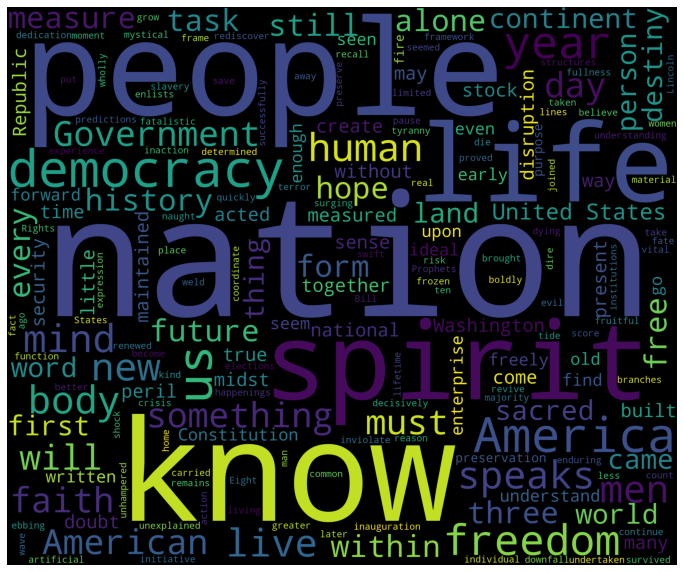

In [161]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [150]:
text1 = inaugural.raw('1961-Kennedy.txt')
text1 = re.sub(r'==,+?==+,','',text1)
text1=text1.replace('\n','')

In [151]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(text)

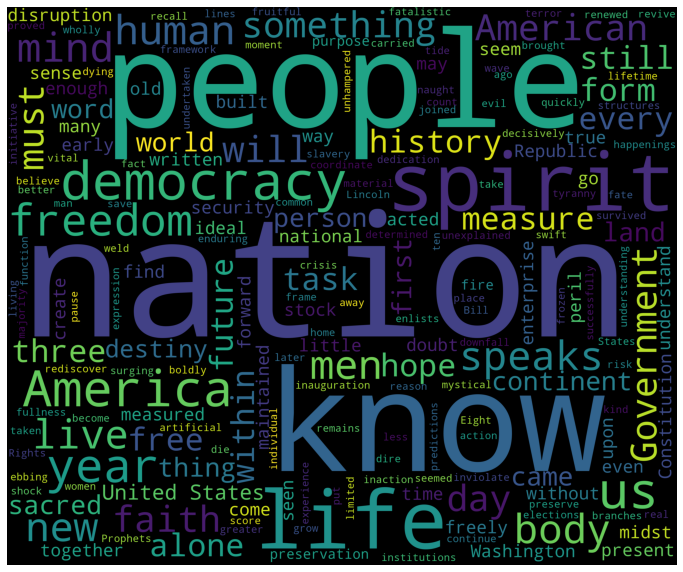

In [159]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [153]:
text2 = inaugural.raw('1973-Nixon.txt')
text2 = re.sub(r'==,+?==+,','',text2)
text2=text2.replace('\n','')

In [154]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(text)

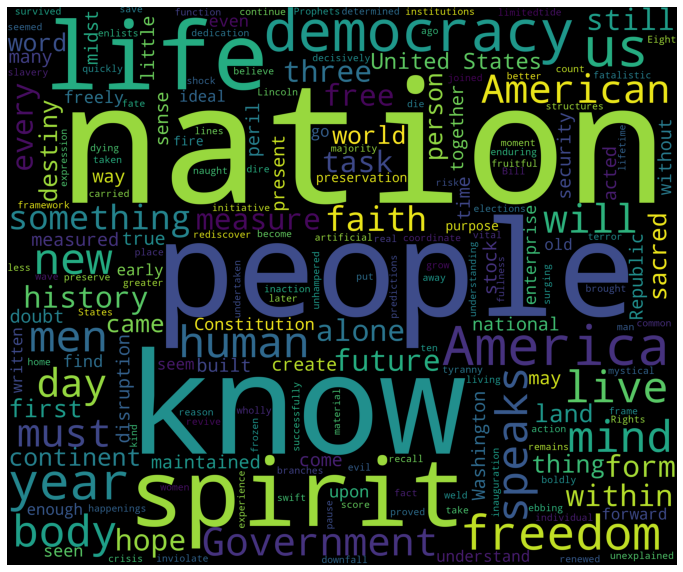

In [160]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()